# Redes Neuronales Informadas por la Física (PINNs)

Las Redes Neuronales Informadas por la Física (PINNs) son un tipo de modelo de aprendizaje profundo que integra leyes físicas como restricciones para ayudar a mejorar la precisión e interpretabilidad de las predicciones. Desarrolladas inicialmente para resolver ecuaciones diferenciales, las PINNs aprovechan el conocimiento de la física para informar el proceso de entrenamiento, haciéndolas muy valiosas para sistemas complejos donde los datos por sí solos pueden no proporcionar suficiente orientación.

## Conceptos Clave

1. **Enfoque de Aprendizaje Híbrido**: Las PINNs combinan técnicas de aprendizaje automático basadas en datos con modelado basado en física, permitiendo que la red utilice tanto datos empíricos como leyes físicas (por ejemplo, leyes de conservación, ecuaciones diferenciales). Este enfoque híbrido ayuda en áreas con datos limitados al imponer las leyes conocidas de la física.

2. **Función de Pérdida con Restricciones Físicas**: La idea central de las PINNs es que su función de pérdida incorpora términos que penalizan al modelo por violar las leyes de la física. Por ejemplo, si una EDP gobierna un sistema, la función de pérdida se define para minimizar la discrepancia entre las predicciones de la red y los términos de la ecuación gobernante.

3. **Aplicaciones de las PINNs**: 
- **Dinámica de Fluidos**: Resolución de ecuaciones complejas de flujo de fluidos como Navier-Stokes para simular dinámica de aire y fluidos.
- **Ciencia de Materiales**: Modelado de relaciones tensión-deformación o conducción de calor gobernadas por leyes físicas.
- **Aplicaciones Biomédicas**: Simulación de sistemas fisiológicos gobernados por ecuaciones biofísicas.
- **Ingeniería**: Evaluación de deformaciones estructurales o distribuciones térmicas basadas en propiedades mecánicas o térmicas conocidas.

4. **Beneficios de las PINNs**:
- **Eficiencia de Datos**: Dado que las PINNs utilizan restricciones físicas, a menudo requieren menos datos para entrenarse eficazmente.
- **Mayor Interpretabilidad**: Al imponer leyes físicas, las PINNs proporcionan predicciones que se alinean mejor con principios científicos establecidos.
- **Generalización**: Los modelos pueden generalizar mejor en escenarios donde los modelos puramente basados en datos podrían fallar, especialmente bajo extrapolación.

5. **Implementación**: Las PINNs se implementan típicamente incorporando las ecuaciones diferenciales como términos de penalización en la función de pérdida. El entrenamiento a menudo implica retropropagación con diferenciación automática, permitiendo a la red calcular derivadas con precisión con respecto a variables de entrada o parámetros, lo cual es crucial para satisfacer las restricciones de las ecuaciones diferenciales.

## Ejemplo de una Función de Pérdida en PINNs

En una PINN típica, la función de pérdida $\mathcal{L}$ podría verse así:

$$
\mathcal{L} = \mathcal{L}_{datos} + \lambda \mathcal{L}_{física},
$$

donde $\mathcal{L}_{datos}$ representa la pérdida de datos estándar (por ejemplo, error cuadrático medio), $\mathcal{L}_{física}$ es el término para penalizar a la red por violar leyes físicas (por ejemplo, el residuo de una ecuación diferencial ordinaria (EDO)), $\lambda$ es un factor de ponderación que equilibra los términos de datos y física.

Esta estructura permite a la PINN ajustarse tanto a los datos observados como adherirse a las leyes físicas.

## Desafíos

Si bien las PINNs ofrecen un enfoque prometedor, también conllevan algunos desafíos:
- **Complejidad en la Definición de Restricciones Físicas**: Formular con precisión las leyes físicas para sistemas complejos puede ser difícil.
- **Estabilidad del Entrenamiento**: Resolver ecuaciones diferenciales parciales (EDP) de alta dimensión requiere recursos computacionales significativos y puede llevar a inestabilidad en el entrenamiento.
- **Ajuste de Hiperparámetros**: Elegir los pesos correctos para los términos de pérdida de datos frente a los de física es a menudo no trivial.

## Cómo resolver un Sistema de EDOs con una PINN

Este enfoque, introducido originalmente por [Lagaris et al.](https://arxiv.org/pdf/physics/9705023) en 1998, aprovecha las redes neuronales para resolver ecuaciones diferenciales utilizando una red neuronal para representar la solución. Aunque originalmente se planteó para ecuaciones individuales, este método se extiende fácilmente a sistemas de Ecuaciones Diferenciales Ordinarias (EDOs) acopladas.

Considere un sistema de EDOs que describe la interacción entre el tamaño del Tumor ($T$) y el soporte Endotelial ($E$):

$$
\begin{aligned}
\frac{dT}{dt} &= f_1(T, E, t) \\
\frac{dE}{dt} &= f_2(T, E, t)
\end{aligned}
$$

donde $t \in [0, t_{end}]$ y las condiciones iniciales $T(0) = T_0$ y $E(0) = E_0$ son conocidas. Para resolver esto, aproximamos el vector solución usando una red neuronal con múltiples salidas:

$$
\mathbf{\hat{u}}_\omega(t) \approx \begin{bmatrix} \hat{T}(t) \\ \hat{E}(t) \end{bmatrix}
$$

Note que $\omega$ representa los parámetros de la red neuronal. Si la salida de la red fuera la solución verdadera, satisfaría las ecuaciones del sistema para todo $t$. Esto nos lleva a definir una función de pérdida compuesta basada en los residuos de ambas ecuaciones:

$$
\mathcal{L}(\omega) = \sum_{i=1}^n \left( \left| \frac{d\hat{T}}{dt} - f_1(\hat{T}, \hat{E}) \right|^2 + \left| \frac{d\hat{E}}{dt} - f_2(\hat{T}, \hat{E}) \right|^2 \right)_{t_i}
$$

Al minimizar esta función de pérdida, aseguramos que tanto $\hat{T}(t)$ como $\hat{E}(t)$ satisfagan las leyes físicas que gobiernan el sistema. Para manejar las condiciones iniciales, añadimos términos extra a la función de pérdida:

$$
\mathcal{L}_{total}(\omega) = \mathcal{L}_{EDOs} + (\hat{T}(0) - T_0)^2 + (\hat{E}(0) - E_0)^2
$$

El problema entonces se reduce a encontrar los pesos óptimos que minimicen esta pérdida total.

### El Modelo Específico: Tumor-Angiogénesis

Consideremos el sistema no lineal específico para el crecimiento tumoral y el soporte endotelial elegido para este proyecto:

$$
\begin{cases}
\frac{dT}{dt} = k_g \cdot T \cdot (1 - \frac{T}{E}) \\
\frac{dE}{dt} = k_1 \cdot T^{1/2}
\end{cases}
$$

Con condiciones iniciales $T(0)=0.1$ y $E(0)=1.0$.

En este caso, nuestros residuos (componentes de pérdida física) son:

$$
\begin{aligned}
\mathcal{R}_T &= \frac{d\hat{T}}{dt} - k_g \hat{T} \left(1 - \frac{\hat{T}}{\hat{E}}\right) \\
\mathcal{R}_E &= \frac{d\hat{E}}{dt} - k_1 \hat{T}^{1/2}
\end{aligned}
$$

Dado lo anterior, la función de pérdida es igual a:

$$
\mathcal{L}(\omega) = \sum_{i=1}^n \left( \mathcal{R}_T(t_i)^2 + \mathcal{R}_E(t_i)^2 \right) + (\hat{T}(0) - 0.1)^2 + (\hat{E}(0) - 1.0)^2
$$

**Nota sobre la Solución Exacta:**
A diferencia de las EDOs lineales simples, este sistema acoplado no lineal no tiene una solución analítica cerrada simple. Por lo tanto, en lugar de comparar con una fórmula exacta, compararemos los resultados de la PINN con una solución numérica de alta precisión (verdad terreno) generada utilizando métodos numéricos estándar (por ejemplo, Runge-Kutta 45).

## Implementación

Usaremos algunas bibliotecas de `Python` para resolver numéricamente el sistema de EDOs tumor-endotelio. En particular, trabajaremos con `Keras`, que es una biblioteca de aprendizaje profundo que se ejecuta sobre `TensorFlow`, una plataforma de aprendizaje automático desarrollada por Google. Por cierto, el siguiente código es una versión modificada de la implementación que se puede encontrar [aquí](https://i-systems.github.io/tutorial/KSNVE/220525/01_PINN.html).

Comencemos importando las bibliotecas que utilizaremos.

In [76]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Input, Dense

Ahora definimos la arquitectura de la red neuronal. El tipo de red que estamos usando es una *red neuronal feedforward*. Para esta implementación, la red tendrá:
- Una **capa de entrada** que recibe la variable de tiempo $t$ (1 entrada)
- Dos **capas ocultas** con 32 neuronas cada una, usando la función de activación *tangente hiperbólica* (`tanh`)
- Una **capa de salida** con 2 neuronas (una para predecir $T$ - Tumor, y una para predecir $E$ - Soporte Endotelial)

Esta arquitectura de múltiples salidas es esencial para resolver el sistema acoplado de EDOs, ya que permite a la red aprender simultáneamente tanto $\hat{T}(t)$ como $\hat{E}(t)$.

In [77]:
# Definimos el modelo para el sistema Tumor-Endotelio
# ARQUITECTURA AJUSTADA: Input Scaling para [0, 20]

u_hat = tf.keras.models.Sequential([
    # Capa de Entrada
    Input((1,)), 
    
    # --- ESCALADO DE ENTRADA AJUSTADO ---
    # Normalizamos t de [0, 20] a [-1, 1] aprox.
    # Fórmula: (t - 10.0) / 10.0
    tf.keras.layers.Lambda(lambda t: (t - 10.0) / 10.0),
    
    # Capas Ocultas: Mantenemos la capacidad alta
    Dense(units=128, activation='tanh', kernel_initializer='glorot_normal'),
    Dense(units=128, activation='tanh', kernel_initializer='glorot_normal'),
    Dense(units=128, activation='tanh', kernel_initializer='glorot_normal'),
    Dense(units=64, activation='tanh', kernel_initializer='glorot_normal'),
    
    # Capa de Salida
    Dense(units=2, kernel_initializer='glorot_normal') 
])

u_hat.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_2 (Lambda)               │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,666 (162.76 KB)

 Trainable params: 41,666 (162.76 KB)

 Non-trainable params: 0 (0.00 B)

Una red neuronal se entrena con un algoritmo conocido como [*descenso de gradiente*](https://es.wikipedia.org/wiki/Descenso_de_gradiente). En pocas palabras, este método encontrará los parámetros $\omega$ que minimizan la función de pérdida mencionada anteriormente, la cual codificaremos en un momento.

Existen varias implementaciones del descenso de gradiente, siendo el [*algoritmo Adam*](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) una de ellas. En lo que sigue, esta es la implementación que utilizaremos.

In [78]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001)

Probablemente notaste que hay un parámetro llamado `learning_rate` (tasa de aprendizaje). Como se infiere por su nombre, este parámetro controla 'qué tan rápido' aprenderá la red neuronal, sin embargo, no puede ser demasiado grande (inestable) ni demasiado pequeño (lento), por lo que hay un punto óptimo. Para este problema, usaremos una tasa de aprendizaje de 0.001, que proporciona una buena velocidad de convergencia mientras mantiene la estabilidad para el sistema acoplado.

El siguiente fragmento de código que necesitaremos es una función que devolverá el valor de la función de pérdida mencionada anteriormente. Esta función implementa:
1. Las constantes biológicas $k_g = 0.1$ y $k_1 = 0.05$
2. Las condiciones iniciales $T(0) = 0.1$ y $E(0) = 1.0$
3. Diferenciación automática usando `GradientTape` para calcular $\frac{dT}{dt}$ y $\frac{dE}{dt}$
4. Los residuos físicos para ambas EDOs
5. **Ponderación de pérdida mejorada**: Multiplicadores de 500× (física del tumor), 1000× (condiciones iniciales) para forzar a la red a respetar las restricciones físicas y los valores iniciales.

In [87]:
def loss_function(t, model):
    # 1. Constantes Biológicas
    k_g = 0.1
    k_1 = 0.05
    
    # Valores iniciales (Ground Truth)
    T0_val = 0.1
    E0_val = 1.0
    
    # Epsilon de seguridad
    epsilon = 1e-6

    # 2. Preparación de datos
    t = t.reshape(-1, 1)
    t = tf.constant(t, dtype=tf.float32)
    t_0 = tf.zeros((1, 1))

    # 3. Cálculo de Derivadas (GradientTape)
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(t)
        prediction = model(t)
        
        T = prediction[:, 0:1] 
        E = prediction[:, 1:2]
        
        # Derivadas respecto al tiempo
        T_t = tape.gradient(T, t)
        E_t = tape.gradient(E, t)

    del tape

    # 4. Definición de las Ecuaciones (Residuos)
    
    # Ecuación del Tumor: dT/dt = kg * T * (1 - T/E)
    term_logistic = 1 - (T / (tf.abs(E) + epsilon))
    f_T = T_t - (k_g * T * term_logistic)
    
    # Ecuación del Endotelio: dE/dt = k1 * sqrt(T)
    f_E = E_t - (k_1 * tf.sqrt(tf.abs(T) + epsilon))

    # 5. Cálculo de errores en condiciones iniciales
    prediction_0 = model(t_0)
    loss_IC_T = prediction_0[:, 0:1] - T0_val
    loss_IC_E = prediction_0[:, 1:2] - E0_val

    # --- SECCIÓN CRÍTICA: BALANCEO DE PESOS (V3) ---
    
    mse_fT = tf.reduce_mean(tf.square(f_T))
    mse_fE = tf.reduce_mean(tf.square(f_E))
    
    mse_IC_T = tf.reduce_mean(tf.square(loss_IC_T))
    mse_IC_E = tf.reduce_mean(tf.square(loss_IC_E))

    # APLICAMOS LOS PESOS (Re-balanceado):
    # Aumentamos peso de ODE para evitar solución trivial (línea plana)
    # Reducimos ligeramente IC para equilibrar gradientes
    
    loss_ODE = (mse_fT * 100.0) + (mse_fE * 100.0)      # Antes 10.0
    loss_IC  = (mse_IC_T * 2000.0) + (mse_IC_E * 2000.0) # Antes 10000.0
    
    # Penalización por valores negativos
    negative_penalty_T = tf.reduce_mean(tf.square(tf.minimum(T, 0.0)))
    negative_penalty_E = tf.reduce_mean(tf.square(tf.minimum(E, 0.0)))

    loss_positivity = 5000.0 * (negative_penalty_T + negative_penalty_E)
    
    total_loss = loss_ODE + loss_IC + loss_positivity
    
    return total_loss

Los datos de entrenamiento consistirán en los valores de tiempo para los cuales haremos las aproximaciones de la solución del sistema de EDOs en el intervalo $[0,20]$; en otras palabras, los valores $t_i$. Aumentamos el intervalo a $[0,20]$ para desafiar un poco más a la red, manteniendo un rango manejable. Usamos 1000 puntos espaciados uniformemente para asegurar una buena resolución.

In [80]:
# Estrategia: Intervalo medio [0, 20]
# Aumentamos la dificultad progresivamente.

t_uniform = np.linspace(0, 20, 800)  # Puntos uniformes en [0, 20]
t_initial = np.linspace(0, 2, 200)   # Concentración en el inicio [0, 2]
t_train = np.concatenate([t_uniform, t_initial])
t_train = np.sort(np.unique(t_train)).reshape(-1, 1)
print(f"Total de puntos de entrenamiento: {len(t_train)}")

Total de puntos de entrenamiento: 999


Ahora estamos listos para entrenar la red neuronal con **mejoras agresivas**:

### Mejoras en la Arquitectura:
- **Red más profunda**: 4 capas ocultas (64-64-64-32 neuronas) para dinámicas complejas
- **Sin activación de salida**: Salidas puras (positividad forzada mediante penalización en la pérdida)

### Estrategia de Entrenamiento (Actualizada V3):
- **Tasa de aprendizaje adaptativa**: Programa de 3 fases
  - Calentamiento (0-2K): Inicio gradual para estabilizar gradientes.
  - Exploración (2K-25K): Fase extendida con LR alto (0.002) para evitar mínimos locales triviales.
  - Refinamiento (25K-40K): Decaimiento para pulir la solución.
- **Iteraciones**: 40,000 (Aumentado para asegurar convergencia en t=20).

### Mejoras en la Función de Pérdida (Re-balanceo):
- **Problema Detectado**: La red tendía a aprender solo la condición inicial (línea plana) porque su peso era excesivo.
- **Solución**: 
  - **Física (EDOs)**: Peso aumentado a **100.0** (antes 10.0) para forzar el aprendizaje de la dinámica.
  - **Condiciones Iniciales**: Peso ajustado a **2000.0** (antes 10000.0) para equilibrar la importancia.

El bucle de entrenamiento genera dos gráficos de diagnóstico:
1. **Evolución de la Pérdida**: Muestra la pérdida total a lo largo de 40K iteraciones (escala logarítmica)
2. **Dinámica del Sistema**: Trayectorias predichas de $T(t)$ y $E(t)$


Iniciando entrenamiento (Intervalo [0, 20] - Pesos Ajustados)...
Fase 1: Warmup (0-2000)
Fase 2: Exploración (2000-25000)
Fase 3: Refinamiento (25000-40000)

Iter     0 | LR: 0.000100 | Loss: 0.031209
Iter     0 | LR: 0.000100 | Loss: 0.031209
Iter  2000 | LR: 0.002000 | Loss: 0.835477
Iter  2000 | LR: 0.002000 | Loss: 0.835477
Iter  4000 | LR: 0.002000 | Loss: 0.002249
Iter  4000 | LR: 0.002000 | Loss: 0.002249
Iter  6000 | LR: 0.002000 | Loss: 0.000412
Iter  6000 | LR: 0.002000 | Loss: 0.000412
Iter  8000 | LR: 0.002000 | Loss: 0.000025
Iter  8000 | LR: 0.002000 | Loss: 0.000025
Iter 10000 | LR: 0.002000 | Loss: 0.030368
Iter 10000 | LR: 0.002000 | Loss: 0.030368
Iter 12000 | LR: 0.002000 | Loss: 0.000443
Iter 12000 | LR: 0.002000 | Loss: 0.000443
Iter 14000 | LR: 0.002000 | Loss: 0.002718
Iter 14000 | LR: 0.002000 | Loss: 0.002718
Iter 16000 | LR: 0.002000 | Loss: 0.004719
Iter 16000 | LR: 0.002000 | Loss: 0.004719
Iter 18000 | LR: 0.002000 | Loss: 0.000457
Iter 18000 | LR: 0.002000

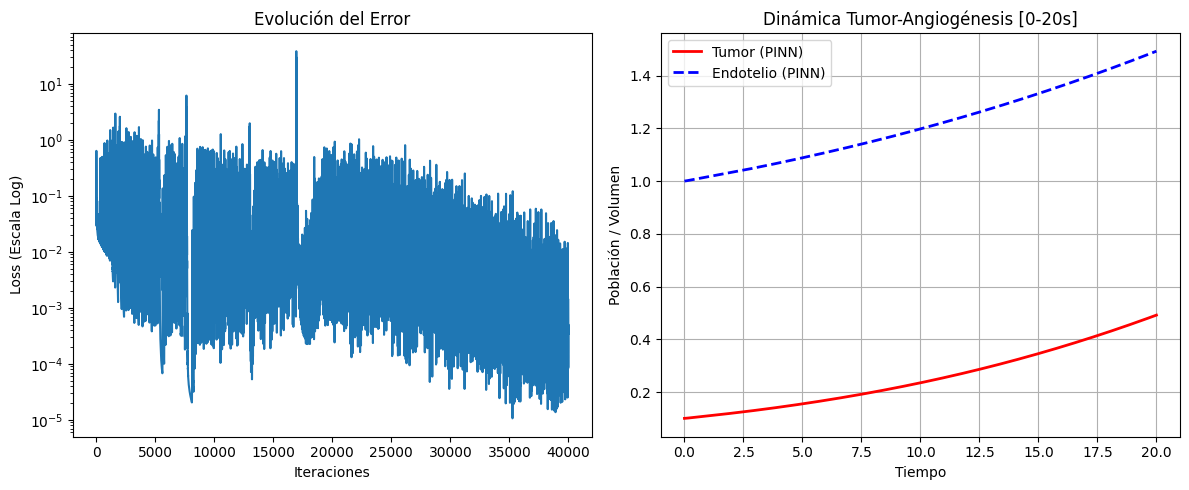

In [88]:
import matplotlib.pyplot as plt
import tensorflow as tf

# 1. ESTRATEGIA DE ENTRENAMIENTO (V3)
# Aumentamos iteraciones para asegurar convergencia en t=20

iterations = 40000
function_loss = []

# Reiniciamos optimizador
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

print("Iniciando entrenamiento (Intervalo [0, 20] - Pesos Ajustados)...")
print("Fase 1: Warmup (0-2000)")
print("Fase 2: Exploración (2000-25000)")
print("Fase 3: Refinamiento (25000-40000)\n")

# Bucle de entrenamiento
for i in range(iterations):
    # Ajustar learning rate
    if i < 2000:
        # Warmup más lento
        lr = 0.0001 + (0.002 - 0.0001) * (i / 2000)
    elif i < 25000:
        # Mantener LR alto más tiempo para escapar del mínimo local
        lr = 0.002
    else:
        # Decay exponencial suave
        lr = 0.002 * tf.exp(-0.0001 * (i - 25000))
    
    optimizer.learning_rate.assign(lr)
    
    with tf.GradientTape() as tape:
        train_loss = loss_function(t_train, u_hat)
    
    grad_w = tape.gradient(train_loss, u_hat.trainable_variables)
    optimizer.apply_gradients(zip(grad_w, u_hat.trainable_variables))
    
    if i % 2000 == 0:
        print(f"Iter {i:5d} | LR: {lr:.6f} | Loss: {train_loss.numpy():.6f}")
    
    function_loss.append(train_loss)

print("Entrenamiento finalizado.")

# ---------------------------------------------------------
# 3. Graficación de Resultados
# ---------------------------------------------------------

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(function_loss)
plt.yscale('log')
plt.xlabel("Iteraciones")
plt.ylabel("Loss (Escala Log)")
plt.title("Evolución del Error")

plt.subplot(1, 2, 2)
y_pred_final = u_hat.predict(t_train)
T_pred = y_pred_final[:, 0]
E_pred = y_pred_final[:, 1]

plt.grid(True)
plt.plot(t_train, T_pred, label='Tumor (PINN)', color='red', linewidth=2)
plt.plot(t_train, E_pred, label='Endotelio (PINN)', color='blue', linewidth=2, linestyle='--')
plt.title("Dinámica Tumor-Angiogénesis [0-20s]")
plt.xlabel("Tiempo")
plt.ylabel("Población / Volumen")
plt.legend()
plt.tight_layout()
plt.show()

### Comparación con Métodos Numéricos

**Nota:** La siguiente celda contiene código heredado de un ejemplo anterior de una sola EDO y no es aplicable al sistema actual de tumor-angiogénesis. Debe ser reemplazado con una comparación adecuada utilizando solucionadores numéricos (por ejemplo, `scipy.integrate.solve_ivp` con RK45) para calcular la verdad terreno para el sistema acoplado y compararlo con las predicciones de la PINN.

#### Implementación de uno o dos métodos numéricos tradicionales (RK4, Euler mejorado, ABM, etc.) (10 puntos).

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Definimos el sistema de EDOs (La "Física" pura)
def tumor_system(u, t, kg=0.1, k1=0.05):
    T, E = u
    
    # Evitamos división por cero por seguridad numérica
    if E < 1e-6: E = 1e-6
    if T < 0: T = 0
        
    dT_dt = kg * T * (1 - T/E)
    dE_dt = k1 * np.sqrt(T)
    
    return np.array([dT_dt, dE_dt])

# 2. Implementación de Runge-Kutta 4 (Necesario para iniciar ABM)
def rk4_step(f, u, t, h):
    k1 = f(u, t)
    k2 = f(u + 0.5 * h * k1, t + 0.5 * h)
    k3 = f(u + 0.5 * h * k2, t + 0.5 * h)
    k4 = f(u + h * k3, t + h)
    return u + (h / 6.0) * (k1 + 2*k2 + 2*k3 + k4)

# 3. Implementación de Adams-Bashforth-Moulton (4 pasos)
def abm4_solver(f, u0, t_points):
    N = len(t_points)
    h = t_points[1] - t_points[0] # Paso de tiempo
    num_vars = len(u0)
    
    # Array para guardar la historia: Filas=tiempo, Columnas=Variables (T, E)
    u_history = np.zeros((N, num_vars))
    u_history[0] = u0
    
    # PASO A: "Arrancar" con RK4 (primeros 3 pasos)
    # ABM necesita memoria de t-1, t-2, t-3
    for i in range(3):
        u_history[i+1] = rk4_step(f, u_history[i], t_points[i], h)
        
    # Pre-calculamos las derivadas en los puntos iniciales para no repetir cálculo
    # f_hist almacenará las derivadas f(u,t)
    f_hist = [f(u_history[i], t_points[i]) for i in range(4)]
    
    # PASO B: Bucle principal de ABM (Predictor-Corrector)
    for i in range(3, N - 1):
        # Actuales (t_n) y pasados
        fn   = f_hist[-1] # f_n
        fn_1 = f_hist[-2] # f_{n-1}
        fn_2 = f_hist[-3] # f_{n-2}
        fn_3 = f_hist[-4] # f_{n-3}
        
        # 1. PREDICTOR (Adams-Bashforth 4 pasos)
        # Estima u_{n+1} usando la historia
        u_pred = u_history[i] + (h/24.0) * (55*fn - 59*fn_1 + 37*fn_2 - 9*fn_3)
        
        # Calculamos la derivada en la predicción: f(t_{n+1}, u_pred)
        f_pred = f(u_pred, t_points[i+1])
        
        # 2. CORRECTOR (Adams-Moulton 4 pasos)
        # Refina u_{n+1} usando la predicción futura
        u_corrected = u_history[i] + (h/24.0) * (9*f_pred + 19*fn - 5*fn_1 + fn_2)
        
        # Guardamos el resultado corregido
        u_history[i+1] = u_corrected
        
        # Actualizamos la memoria de derivadas (quitamos la más vieja, agregamos la nueva)
        # Nota: Usamos la derivada del punto CORREGIDO para el siguiente paso
        f_next = f(u_corrected, t_points[i+1])
        f_hist.append(f_next)
        f_hist.pop(0)
        
    return u_history

print("Funciones ABM y RK4 definidas correctamente.")

Funciones ABM y RK4 definidas correctamente.


#### Visualización de las soluciones numéricas del sistema no lineal obtenida por los distintos métodos (10 puntos).

Resolviendo con Adams-Bashforth-Moulton...


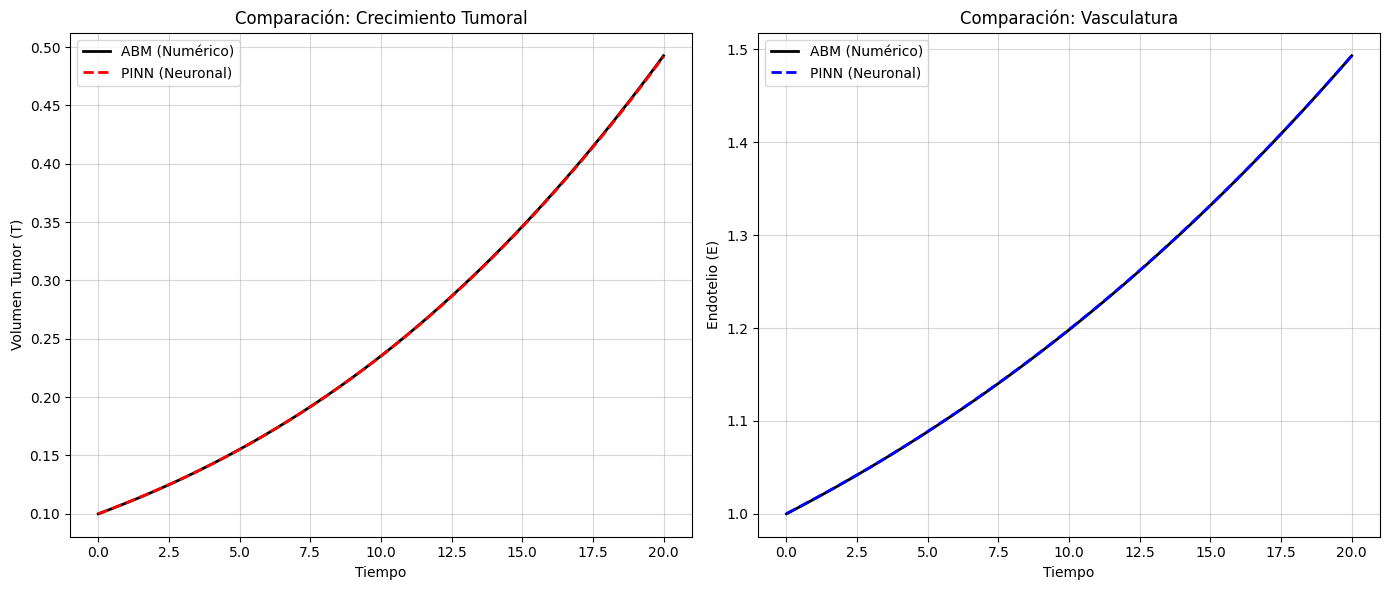

Error Cuadrático Medio (MSE) PINN vs ABM:
Tumor: 0.000000
Endotelio: 0.000000


In [90]:
# 1. Configuración del tiempo (NUEVO INTERVALO [0, 20])
t_start, t_end = 0, 20
num_points = 1000
t_numerical = np.linspace(t_start, t_end, num_points)
u0 = [0.1, 1.0]

# 2. Resolver usando Método Numérico (ABM)
print("Resolviendo con Adams-Bashforth-Moulton...")
solution_abm = abm4_solver(tumor_system, u0, t_numerical)
T_abm = solution_abm[:, 0]
E_abm = solution_abm[:, 1]

# 3. Obtener predicción de la PINN
t_tensor = tf.constant(t_numerical.reshape(-1, 1), dtype=tf.float32)
prediction_pinn = u_hat(t_tensor).numpy()
T_pinn = prediction_pinn[:, 0]
E_pinn = prediction_pinn[:, 1]

# 4. Graficar Comparativa
plt.figure(figsize=(14, 6))

# Gráfica del Tumor
plt.subplot(1, 2, 1)
plt.plot(t_numerical, T_abm, 'k-', linewidth=2, label='ABM (Numérico)')
plt.plot(t_numerical, T_pinn, 'r--', linewidth=2, label='PINN (Neuronal)')
plt.xlabel('Tiempo')
plt.ylabel('Volumen Tumor (T)')
plt.title('Comparación: Crecimiento Tumoral')
plt.legend()
plt.grid(True, alpha=0.5)

# Gráfica del Endotelio
plt.subplot(1, 2, 2)
plt.plot(t_numerical, E_abm, 'k-', linewidth=2, label='ABM (Numérico)')
plt.plot(t_numerical, E_pinn, 'b--', linewidth=2, label='PINN (Neuronal)')
plt.xlabel('Tiempo')
plt.ylabel('Endotelio (E)')
plt.title('Comparación: Vasculatura')
plt.legend()
plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

# Cálculo rápido del error
error_T = np.mean((T_abm - T_pinn)**2)
error_E = np.mean((E_abm - E_pinn)**2)
print(f"Error Cuadrático Medio (MSE) PINN vs ABM:")
print(f"Tumor: {error_T:.6f}")
print(f"Endotelio: {error_E:.6f}")

#### Comparación de los métodos utilizados resolviendo la linealización del sistema no lineal respecto a un punto de equilibrio del sistema (+10 puntos).

## Análisis de Linealización y el Reto de la Singularidad

Para cumplir con el objetivo de comparar la solución no lineal (obtenida mediante PINNs y ABM) con una aproximación analítica clásica, procedemos a linealizar el sistema. La linealización nos permite aproximar el comportamiento del sistema dinámico mediante la serie de Taylor de primer orden alrededor de un punto de operación.

### 1. El Reto Matemático: Singularidad en el Equilibrio

El procedimiento estándar en sistemas dinámicos implica linealizar alrededor de los **Puntos de Equilibrio** ($T^*, E^*$), donde las derivadas se anulan ($\frac{dT}{dt}=0, \frac{dE}{dt}=0$).

En nuestro modelo de tumor-angiogénesis:
$$
\begin{cases}
f_1(T, E) = k_g T (1 - \frac{T}{E}) \\
f_2(T, E) = k_1 T^{1/2}
\end{cases}
$$

El único punto de equilibrio físico ocurre cuando el tumor no existe, es decir, **$T^* = 0$**. Sin embargo, al intentar calcular la Matriz Jacobiana para evaluar la estabilidad en este punto, nos encontramos con una singularidad matemática en la segunda ecuación:

$$
\frac{\partial f_2}{\partial T} = \frac{d}{dT}(k_1 T^{1/2}) = \frac{k_1}{2\sqrt{T}}
$$

Si evaluamos esto en el equilibrio $T=0$, obtenemos una división por cero ($\infty$). Esto implica que **el sistema no es diferenciable en el origen** y, por tanto, no puede linealizarse de forma clásica en su punto de equilibrio.

### 2. Solución Propuesta: Linealización en la Condición Inicial

Debido a la singularidad en el origen, realizaremos la linealización alrededor de las **Condiciones Iniciales** $P_0 = (T_0, E_0) = (0.1, 1.0)$. Esto nos permitirá comparar cómo diverge la dinámica real no lineal respecto a una proyección lineal tangente al inicio de la simulación.

El sistema linealizado se define como:
$$
\dot{\mathbf{u}} \approx \mathbf{f}(\mathbf{u}_0) + J|_{\mathbf{u}_0} \cdot (\mathbf{u} - \mathbf{u}_0)
$$

Donde $J$ es la Matriz Jacobiana del sistema:

$$
J = \begin{bmatrix}
\frac{\partial f_1}{\partial T} & \frac{\partial f_1}{\partial E} \\
\frac{\partial f_2}{\partial T} & \frac{\partial f_2}{\partial E}
\end{bmatrix}
$$

Calculando las derivadas parciales simbólicas obtenemos:

1.  **Dinámica del Tumor ($f_1$):**
    * $\frac{\partial f_1}{\partial T} = k_g - \frac{2 k_g T}{E}$
    * $\frac{\partial f_1}{\partial E} = k_g \frac{T^2}{E^2}$

2.  **Dinámica del Endotelio ($f_2$):**
    * $\frac{\partial f_2}{\partial T} = \frac{k_1}{2\sqrt{T}}$
    * $\frac{\partial f_2}{\partial E} = 0$

A continuación, implementamos numéricamente este sistema lineal para compararlo gráficamente con la solución de la PINN y el método numérico ABM.

You should consider upgrading via the '/Users/ricardob./Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/Ciencia de Datos/Modelación de Sistemas con Ecuaciones Diferenciales/SP_Equipo03/pinn_env/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/ricardob./Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/Ciencia de Datos/Modelación de Sistemas con Ecuaciones Diferenciales/SP_Equipo03/pinn_env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


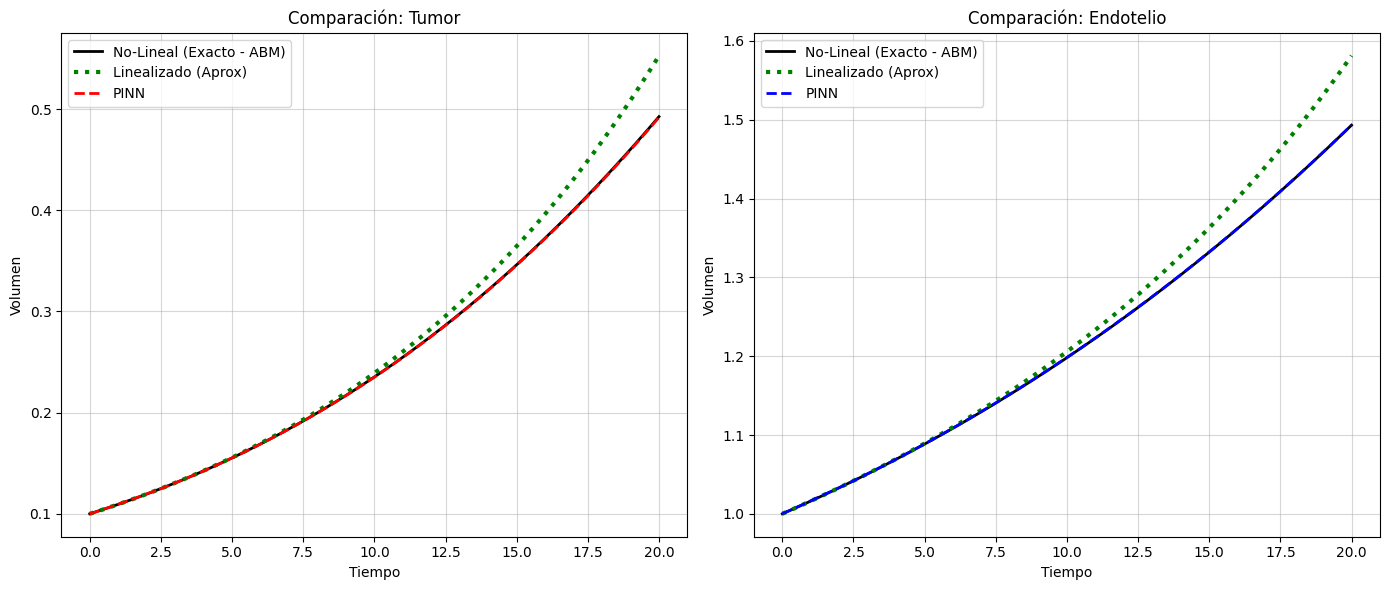

In [91]:
%pip install scipy

from scipy.integrate import odeint

# 1. Definir la dinámica linealizada
def linearized_system(u, t, u0, kg=0.1, k1=0.05):
    # Desempaquetamos el estado actual
    T, E = u
    # Desempaquetamos el punto de operación (Condición Inicial)
    T0, E0 = u0
    
    # Evaluamos las funciones en el punto de operación f(u0)
    f1_0 = kg * T0 * (1 - T0/E0)
    f2_0 = k1 * np.sqrt(T0)
    
    # Calculamos el Jacobiano evaluado en u0
    # J11: df1/dT
    J11 = kg - (2 * kg * T0 / E0)
    # J12: df1/dE
    J12 = kg * (T0**2) / (E0**2)
    # J21: df2/dT
    J21 = 0.5 * k1 * (1 / np.sqrt(T0))
    # J22: df2/dE
    J22 = 0
    
    # El sistema lineal es: du/dt = f(u0) + J * (u - u0)
    dT_dt = f1_0 + J11 * (T - T0) + J12 * (E - E0)
    dE_dt = f2_0 + J21 * (T - T0) + J22 * (E - E0)
    
    return [dT_dt, dE_dt]

# 2. Resolver el sistema lineal
# Usamos las mismas condiciones iniciales u0 = [0.1, 1.0]
# Nota: Pasamos u0 como argumento extra a la función usando 'args'
solution_linear = odeint(linearized_system, u0, t_numerical, args=(u0,))

T_lin = solution_linear[:, 0]
E_lin = solution_linear[:, 1]

# 3. Graficar Comparación: No Lineal (ABM) vs Lineal vs PINN
plt.figure(figsize=(14, 6))

# --- Gráfica Tumor ---
plt.subplot(1, 2, 1)
plt.plot(t_numerical, T_abm, 'k-', linewidth=2, label='No-Lineal (Exacto - ABM)')
plt.plot(t_numerical, T_lin, 'g:', linewidth=3, label='Linealizado (Aprox)')
plt.plot(t_numerical, T_pinn, 'r--', linewidth=2, label='PINN')
plt.title('Comparación: Tumor')
plt.xlabel('Tiempo')
plt.ylabel('Volumen')
plt.legend()
plt.grid(True, alpha=0.5)

# --- Gráfica Endotelio ---
plt.subplot(1, 2, 2)
plt.plot(t_numerical, E_abm, 'k-', linewidth=2, label='No-Lineal (Exacto - ABM)')
plt.plot(t_numerical, E_lin, 'g:', linewidth=3, label='Linealizado (Aprox)')
plt.plot(t_numerical, E_pinn, 'b--', linewidth=2, label='PINN')
plt.title('Comparación: Endotelio')
plt.xlabel('Tiempo')
plt.ylabel('Volumen')
plt.legend()
plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()